# Task 0. Linear classification from scratch with PyTorch

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torch.utils.data import DataLoader, TensorDataset

## Dataset Processing

In [2]:
df = pd.read_csv("../../data/airlines.csv")

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,airline,flight,airport_from,airport_to,day_of_week,time,length,delay
0,16,3036,135,54,4.0,1195,131.0,0
1,13,315,79,207,7.0,707,145.0,0
2,12,6673,253,194,5.0,499,42.0,1
3,15,3668,217,207,2.0,810,70.0,1
4,2,623,153,214,5.0,985,143.0,0


## Splitting to Samples

In [5]:
X = df.drop(["delay"], axis=1).values

In [6]:
y = df.loc[:, "delay"].values
y = y.reshape(-1, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((297980, 7), (99327, 7), (297980, 1), (99327, 1))

#### PyTorch-like method

In [8]:
train_ds = TensorDataset(torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(y_train).type(torch.float16))
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)

test_ds = TensorDataset(torch.from_numpy(X_test).type(torch.float32), torch.from_numpy(y_test).type(torch.float16))
test_dl = DataLoader(test_ds, batch_size=256, shuffle=True)

## PyTorch Classification Model

In [9]:
class MyClassificationModel(nn.Module):
    def __init__(self):
        super(MyClassificationModel, self).__init__()
        self.first_linear = nn.Linear(7, 21)
        self.first_relu = nn.ReLU()
        self.second_linear = nn.Linear(21, 42)
        self.second_relu = nn.ReLU()
        self.third_linear = nn.Linear(42, 14)
        self.third_relu = nn.ReLU()
        self.fourth_linear = nn.Linear(14, 7)
        self.fourth_relu = nn.ReLU()
        self.fifth_linear = nn.Linear(7, 1)

    def forward(self, x):
        y = self.first_linear(x)
        y = self.first_relu(y)
        y = self.second_linear(y)
        y = self.second_relu(y)
        y = self.third_linear(y)
        y = self.third_relu(y)
        y = self.fourth_linear(y)
        y = self.fourth_relu(y)
        y = self.fifth_linear(y)
        return y


model = MyClassificationModel()

In [10]:
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00025)

In [11]:
epochs = 20
losses = {}

with tqdm.trange(1, epochs+1, bar_format="{desc}|{bar:50}|") as t:
    t.set_description(f"[+] Epoch [0/{epochs}], Loss [1.00]")

    for epoch in t:
        for x_b, y_b in train_dl:
            outputs = model(x_b)
            loss_value = loss(outputs, y_b)

            loss_value.backward()
            optimizer.step()
            optimizer.zero_grad()

        losses[epoch] = loss_value.item()
        t.set_description(f"[+] Epoch [{epoch}/{epochs}], Loss [{loss_value.item():.2f}]")

[+] Epoch [20/20], Loss [0.49]: |██████████████████████████████████████████████████|


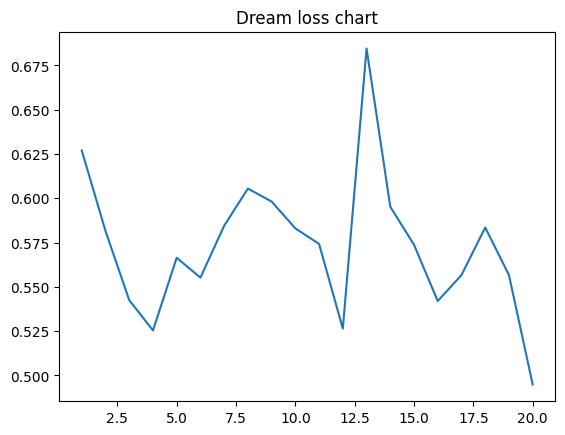

In [12]:
plt.plot(list(losses.keys()), list(losses.values()))
plt.title("Dream loss chart")
plt.show()

In [13]:
y_pred = list(map(lambda value: 0 if value <= -1 else 1, model(torch.from_numpy(X_test).type(torch.float32))))

In [14]:
print(f"[+] Accuracy: {accuracy_score(y_test, y_pred):.4f}")

[+] Accuracy: 0.5863
